<a href="https://colab.research.google.com/github/Aniket658/GN22CDBDS001_2159919/blob/main/Stock_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("AAPL.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.793945,778321600
1,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.725238,767972800
2,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.759592,460734400
3,2000-01-10,0.910714,0.912946,0.845982,0.872768,0.746232,505064000
4,2000-01-11,0.856585,0.887277,0.808036,0.828125,0.708062,441548800


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0         0.928571
1         0.848214
2         0.888393
3         0.872768
4         0.828125
           ...    
5654    141.660004
5655    137.440002
5656    139.229996
5657    136.720001
5658    138.929993
Name: Close, Length: 5659, dtype: float64

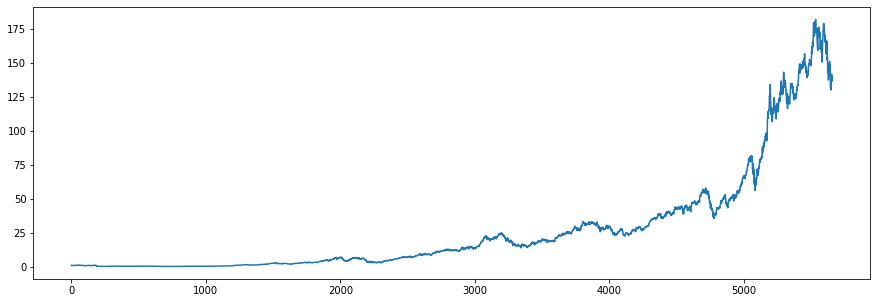

In [11]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(df1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(3961, 1698)

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(3860, 100)
(3860,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(1597, 100)
(1597,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
61/61 [==============================] - 20s 221ms/step - loss: 2.6508e-04 - val_loss: 0.0041
Epoch 2/100
61/61 [==============================] - 11s 174ms/step - loss: 1.1639e-05 - val_loss: 0.0041
Epoch 3/100
61/61 [==============================] - 11s 177ms/step - loss: 1.1328e-05 - val_loss: 0.0063
Epoch 4/100
61/61 [==============================] - 11s 173ms/step - loss: 1.0566e-05 - val_loss: 0.0050
Epoch 5/100
61/61 [==============================] - 11s 175ms/step - loss: 1.0898e-05 - val_loss: 0.0067
Epoch 6/100
61/61 [==============================] - 11s 179ms/step - loss: 1.0573e-05 - val_loss: 0.0050
Epoch 7/100
61/61 [==============================] - 11s 176ms/step - loss: 1.0460e-05 - val_loss: 0.0044
Epoch 8/100
61/61 [==============================] - 11s 185ms/step - loss: 1.0559e-05 - val_loss: 0.0038
Epoch 9/100
61/61 [==============================] - 11s 176ms/step - loss: 9.4005e-06 - val_loss: 0.0037
Epoch 10/100
61/61 [==========================

In [28]:
import tensorflow as tf

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

12.353832973658577

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

84.32624546920412

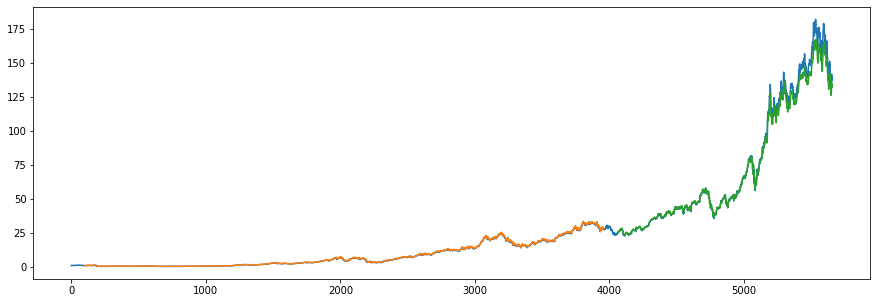

In [33]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

1698

In [49]:
x_input=test_data[1598:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<=30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7232027649879456], [0.7061358690261841], [0.6845778226852417], [0.6640338897705078], [0.6453052759170532], [0.6284269690513611], [0.6132151484489441], [0.5993462800979614], [0.586461067199707], [0.5742528438568115], [0.5625109672546387], [0.5511273145675659], [0.5400758385658264], [0.5293839573860168], [0.5191040635108948], [0.5092894434928894], [0.4999810457229614], [0.49120017886161804], [0.48294785618782043], [0.4752084016799927], [0.4679551124572754], [0.46115514636039734], [0.45477497577667236], [0.4487825334072113], [0.4431491196155548], [0.4378502368927002], [0.43286463618278503], [0.42817386984825134], [0.4237610399723053], [0.41961050033569336], [0.4157072603702545]]


In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,132)

In [53]:
len(df1)

5659

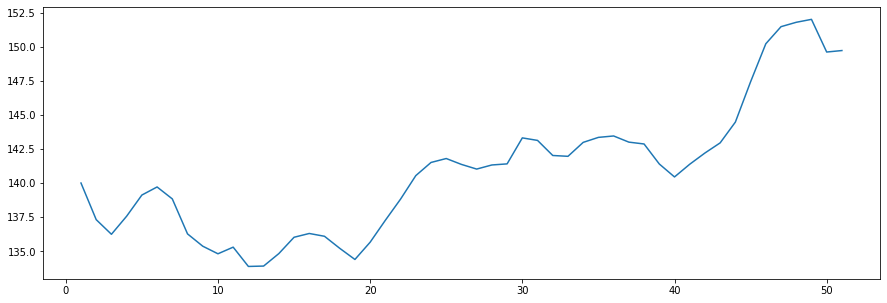

In [67]:


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(np.arange(1,52), test_predict[1400:1451])

In [75]:
# best buying and selling days

# This function finds the buy sell
# schedule for maximum profit

def stockBuySell(price, n, profit):
  
  # Prices must be given for at least two days
  if (n == 1):
    return
  
  # Traverse through given price array
  i = 0
  while (i < (n - 1)):
    
    # Find Local Minima
    # Note that the limit is (n-2) as we are
    # comparing present element to the next element
    while ((i < (n - 1)) and
        (price[i + 1] <= price[i])):
      i += 1
    
    # If we reached the end, break
    # as no further solution possible
    if (i == n - 1):
      break
    
    # Store the index of minima
    buy = i
    i += 1
    
    # Find Local Maxima
    # Note that the limit is (n-1) as we are
    # comparing to previous element
    while ((i < n) and (price[i] >= price[i - 1])):
      i += 1
      
    # Store the index of maxima
    sell = i - 1

    profit += (price[sell] - price[buy])
    
    print("Buy on day: ",buy,"\t\t",
        "Sell on day: ",sell, "\tProfit: ",(price[sell] - price[buy])[0])
    
# Driver code

# Stock prices on consecutive days
price = test_predict[1400:1451]
n = len(price)

# Function call
stockBuySell(price, n, 0)


Buy on day:  2 		 Sell on day:  5 	Profit:  3.4715576
Buy on day:  9 		 Sell on day:  10 	Profit:  0.48687744
Buy on day:  11 		 Sell on day:  15 	Profit:  2.4191895
Buy on day:  18 		 Sell on day:  24 	Profit:  7.406555
Buy on day:  26 		 Sell on day:  29 	Profit:  2.2879639
Buy on day:  32 		 Sell on day:  35 	Profit:  1.4929962
Buy on day:  39 		 Sell on day:  48 	Profit:  11.562912
Buy on day:  49 		 Sell on day:  50 	Profit:  0.10922241


In [73]:
print(price)

[[140.01256]
 [137.3249 ]
 [136.25189]
 [137.57892]
 [139.13068]
 [139.72345]
 [138.8474 ]
 [136.28111]
 [135.37816]
 [134.82082]
 [135.3077 ]
 [133.892  ]
 [133.91989]
 [134.8352 ]
 [136.03285]
 [136.31119]
 [136.10556]
 [135.22414]
 [134.40404]
 [135.67026]
 [137.28   ]
 [138.83382]
 [140.556  ]
 [141.52121]
 [141.8106 ]
 [141.37833]
 [141.03647]
 [141.3375 ]
 [141.41742]
 [143.32443]
 [143.13968]
 [142.03302]
 [141.97229]
 [142.99551]
 [143.3619 ]
 [143.46529]
 [143.0136 ]
 [142.87747]
 [141.41023]
 [140.45876]
 [141.39064]
 [142.21593]
 [142.95961]
 [144.48448]
 [147.44263]
 [150.23033]
 [151.48529]
 [151.80634]
 [152.02167]
 [149.62424]
 [149.73346]]


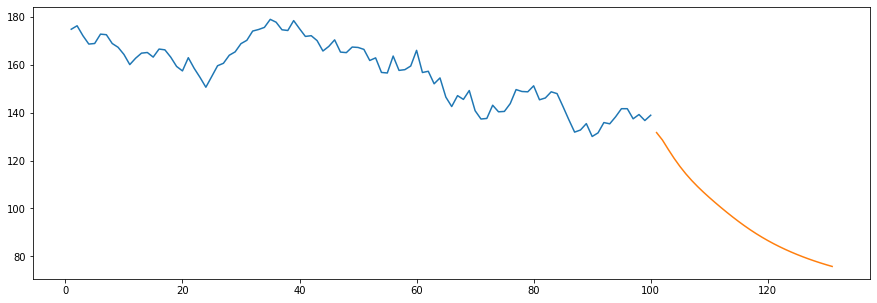

In [76]:
actual_data = scaler.inverse_transform(df1[5559:])
predicted_data = scaler.inverse_transform(lst_output)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(day_new, actual_data)
plt.plot(day_pred, predicted_data)